# Introduction
This notebook mainly computes the ideal values for semantic scales and multi dimensional scaling given the data from MarkStrat. 

The difference between the metrics is explained in the guide:

----
## Semantic Scales vs. Multidimensional Scaling vs. Conjoint Analysis

The three studies—**Semantic Scales**, **Multidimensional Scaling** (MDS), and **Conjoint Analysis**—provide valuable insights into how to reposition a brand to better meet consumer needs. Here’s a guide on when to use each study and its primary objective:

- **Semantic Scales** and **Multidimensional Scaling (MDS)**: Aim to bring your brand closer to the ideal point of the targeted consumer segment.
- **Conjoint Analysis**: Aim to maximize the overall utility of your brand.

In most cases, the results from these three studies will align. However, if you’re wondering, “Which study should I use?” here are some recommendations:

### When to Use Each Study

- **Use Semantic Scales to design R&D projects**: 
  - This study is ideal for determining the optimal level of each physical characteristic, as it provides a direct one-to-one relationship between the study's dimensions and product physical characteristics.

- **Use the MDS study to decide on your strategy**:
  - MDS is excellent for strategy development because it provides a comprehensive overview of the competitive landscape. Comparing perceptual maps side by side can help you:
    - Identify potential repositioning for existing brands.
    - Find opportunities to launch new brands.
    - Anticipate competitor moves.

- **Use the MDS study for communication**:
  - This study is beneficial for communication because:
    1. It focuses on the dimensions that matter most to customers (e.g., Economy, Performance, Convenience).
    2. It allows for repositioning along more physical characteristics than Semantic Scales.

- **Use Conjoint Analysis to validate findings**:
  - Conjoint Analysis can confirm or challenge the insights from the other studies. For example, will the new features or price maximize the total utility of your product?
  - **Be cautious**: Conjoint Analysis may have limitations since it tests only four levels across four dimensions. The optimal level for a given feature often lies between the tested values, but pinpointing the exact optimal level may not be possible.

----


# Analysis

**Initializing**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

from Brands import Sonites
from Analyzer import Analyzer

move_mkt_weights = {
    "Explorers": 0,
    "Shoppers": 0.35,
    "Professionals": 0,
    "High Earners": 0,
    "Savers": 0.65
}


an = Analyzer(marketing_mix_segment_weights=move_mkt_weights, last_period=2)

son = Sonites()



**Percentage expenditure by segment for each product**

In [2]:
df_marketing_mixes = son.get_marketing_mixes(capped=False)
df_marketing_mixes


,Explorers,Shoppers,Professionals,High Earners,Savers
MARKET : Sonites,,,,,
MOST,0.086735,0.285714,0.086735,0.086735,0.454082
MOVE,0.414634,0.097561,0.195122,0.195122,0.097561
ROBUDO,0.090226,0.421053,0.090226,0.090226,0.308271
ROCK,0.092308,0.092308,0.338462,0.384615,0.092308
SOFT,0.149758,0.251208,0.149758,0.149758,0.299517
SOLO,0.202899,0.275362,0.173913,0.173913,0.173913
TONE,0.302326,0.149502,0.122924,0.302326,0.122924
TOPS,0.302682,0.122605,0.302682,0.122605,0.149425


## Semantic scales

In [3]:
son.df_segments_semantic

,Segment,Period,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
Index,,,,,,,,
Explorers_2,Explorers,2,4.55,1.91,5.82,5.91,6.13,3.7
High Earners_2,High Earners,2,3.27,6.37,3.55,4.47,4.78,5.57
Professionals_2,Professionals,2,5.32,5.85,5.03,5.54,5.43,5.23
Savers_2,Savers,2,2.58,3.9,1.78,2.73,2.25,2.13
Shoppers_2,Shoppers,2,1.87,4.97,2.9,4.27,4.05,3.02
Explorers_1,Explorers,1,4.65,1.8,6.03,5.99,6.25,3.54
High Earners_1,High Earners,1,3.27,6.38,3.57,4.64,4.83,5.59
Professionals_1,Professionals,1,5.56,5.85,5.05,5.46,5.28,5
Savers_1,Savers,1,2.53,3.89,1.75,2.58,2.22,2.14


In [4]:
son.df_sonites_semantic

,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
MARKET : Sonites,,,,,,
MOST,2.11,2.34,3.31,1.61,1.5,2.36
MOVE,4.26,1.88,5.93,3.05,3.17,4.83
ROBUDO,2.11,4.77,2.39,4.22,3.18,2.82
ROCK,4.7,6.37,6.47,5.93,5.07,5.7
SOFT,1.73,1.63,3.31,1.61,1.55,2.28
SOLO,1.73,3.23,4,2.07,2.86,4.36
TONE,5.32,6.5,5.12,4.52,5.61,5.88
TOPS,3.16,1.63,1.84,6.32,6.05,5.11


### Compute Distances between Segments and Products 

----
#### Note on "Relevance Score"

The **relevance score** quantifies the alignment between an observation and a benchmark (ideal target), with values ranging from 0 to 1:

- A score of **1** indicates that the observation perfectly matches the benchmark.
- A score of **0** indicates the maximum possible distance between the observation and benchmark, within the given feature space.

##### Formal Calculation

Given:
- An **observation vector** $ \mathbf{x} = (x_1, x_2, \dots, x_n) $
- A **benchmark vector** $ \mathbf{y} = (y_1, y_2, \dots, y_n) $
- A **weight vector** $ \mathbf{w} = (w_1, w_2, \dots, w_n) $, where each $ w_i $ represents the relative importance of feature $ i $ and $ \sum_{i=1}^n w_i = 1 $

The relevance score $ R $ is computed as follows:

\begin{equation*}
R = 1 - \frac{D(\mathbf{x}, \mathbf{y})}{D_{\text{max}}}
\end{equation*}

where:
- $ D(\mathbf{x}, \mathbf{y}) $ is the **weighted Euclidean distance** between the observation and the benchmark:

  \begin{equation*}
  D(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^n w_i \cdot (x_i - y_i)^2}
  \end{equation*}

- $ D_{\text{max}} $ is the **maximum possible weighted Euclidean distance** for the feature space, assuming each feature spans the full range from minimum to maximum possible values. For example, if features range from 1 to 7, the maximum distance for each feature $ i $ would be $ x_i - y_i = 6 $:

  \begin{equation*}
  D_{\text{max}} = \sqrt{\sum_{i=1}^n w_i \cdot (\Delta_i)^2}
  \end{equation*}

  where $ \Delta_i $ is the maximum possible range for feature $ i $.

##### Interpretation

- **High Relevance Score (close to 1)**: The observation is highly similar to the benchmark.
- **Low Relevance Score (closer to 0)**: The observation is farther from the benchmark.
----


#### Compute closest brands for each segment

In [5]:
df_seg_sem = son.df_segments_semantic[:5][['# Features', 'Design Index', 'Battery Life','Display Size', 'Proc. Power', 'Price']]
df_seg_sem


_ = an.get_n_closest(df_base=df_seg_sem, df_performers=son.df_sonites_semantic, num_top=3)

---------- Explorers_2 ----------
Segment:	 TOPS
Distance:	 0.769327415435121
Segment:	 MOVE
Distance:	 0.6822110114087632
Segment:	 ROCK
Distance:	 0.6584721536371159

---------- High Earners_2 ----------
Segment:	 TONE
Distance:	 0.8732389807193461
Segment:	 ROCK
Distance:	 0.8395276600716305
Segment:	 SOLO
Distance:	 0.6897959306749017

---------- Professionals_2 ----------
Segment:	 ROCK
Distance:	 0.9059633520564319
Segment:	 TONE
Distance:	 0.8999245749299667
Segment:	 TOPS
Distance:	 0.7075157038539275

---------- Savers_2 ----------
Segment:	 MOST
Distance:	 0.8559858755982217
Segment:	 ROBUDO
Distance:	 0.8508361551591347
Segment:	 SOFT
Distance:	 0.8288548639418232

---------- Shoppers_2 ----------
Segment:	 ROBUDO
Distance:	 0.9219367080439186
Segment:	 SOLO
Distance:	 0.7583805112904527
Segment:	 MOST
Distance:	 0.6919463301759522



#### Compute closest Segments for each Brand

In [6]:
_ = an.get_n_closest(df_base=son.df_sonites_semantic, df_performers=df_seg_sem)

---------- MOST ----------
Segment:	 Savers_2
Distance:	 0.8559858755982217
Segment:	 Shoppers_2
Distance:	 0.6919463301759522
Segment:	 Explorers_2
Distance:	 0.5036224532331863

---------- MOVE ----------
Segment:	 Explorers_2
Distance:	 0.6822110114087632
Segment:	 Shoppers_2
Distance:	 0.680919831084708
Segment:	 High Earners_2
Distance:	 0.6753162536445776

---------- ROBUDO ----------
Segment:	 Shoppers_2
Distance:	 0.9219367080439186
Segment:	 Savers_2
Distance:	 0.8508361551591347
Segment:	 High Earners_2
Distance:	 0.660595375891528

---------- ROCK ----------
Segment:	 Professionals_2
Distance:	 0.9059633520564319
Segment:	 High Earners_2
Distance:	 0.8395276600716305
Segment:	 Explorers_2
Distance:	 0.6584721536371159

---------- SOFT ----------
Segment:	 Savers_2
Distance:	 0.8288548639418232
Segment:	 Shoppers_2
Distance:	 0.6715085155916547
Segment:	 Explorers_2
Distance:	 0.5015285154979494

---------- SOLO ----------
Segment:	 Shoppers_2
Distance:	 0.7583805112904527
Se

#### Distances between all points

In [7]:
df_all_sem = son.get_comprehensive_df_semantic()
index = df_all_sem.index 

distances = an.compute_distance_centroids(df_all_sem, df_all_sem)[3]


df_out = pd.DataFrame(columns=index, index=index)

for i, start in enumerate(index):
    index_to_search = index[i:]
    for stop in index_to_search:
        df_out.loc[start, stop] = distances[start][stop]
        df_out.loc[stop, start] = distances[start][stop]

df_out

,MOST,MOVE,ROBUDO,ROCK,SOFT,SOLO,TONE,TOPS,Explorers_2,High Earners_2,Professionals_2,Savers_2,Shoppers_2
MOST,1.0,0.662423,0.744878,0.404759,0.956386,0.751414,0.402486,0.446147,0.503622,0.480421,0.44451,0.855986,0.691946
MOVE,0.662423,1.0,0.675565,0.644676,0.6542,0.832468,0.639753,0.648651,0.682211,0.675316,0.667944,0.6326,0.68092
ROBUDO,0.744878,0.675565,1.0,0.582708,0.721301,0.763443,0.572597,0.59681,0.638342,0.660595,0.631205,0.850836,0.921937
ROCK,0.404759,0.644676,0.582708,1.0,0.382753,0.600599,0.886016,0.650607,0.658472,0.839528,0.905963,0.45577,0.628972
SOFT,0.956386,0.6542,0.721301,0.382753,1.0,0.735392,0.379551,0.444457,0.501529,0.456864,0.423362,0.828855,0.671509
SOLO,0.751414,0.832468,0.763443,0.600599,0.735392,1.0,0.610002,0.605214,0.612743,0.689796,0.629962,0.733107,0.758381
TONE,0.402486,0.639753,0.572597,0.886016,0.379551,0.610002,1.0,0.653809,0.638004,0.873239,0.899925,0.455538,0.622749
TOPS,0.446147,0.648651,0.59681,0.650607,0.444457,0.605214,0.653809,1.0,0.769327,0.681643,0.707516,0.49226,0.638921
Explorers_2,0.503622,0.682211,0.638342,0.658472,0.501529,0.612743,0.638004,0.769327,1.0,0.634971,0.714587,0.543343,0.687016
High Earners_2,0.480421,0.675316,0.660595,0.839528,0.456864,0.689796,0.873239,0.681643,0.634971,1.0,0.862556,0.539241,0.704705


## Multi Dimensional Scaling

In [8]:
son.df_segments_mds

,Segment,Period,Economy,Performance,Convenience
Index,,,,,
Explorers_2,Explorers,2,2.02,13.74,-6.96
High Earners_2,High Earners,2,-10.44,4.56,9.98
Professionals_2,Professionals,2,-8.22,9.74,10.88
Savers_2,Savers,2,12.5,-10.72,-4.36
Shoppers_2,Shoppers,2,6.52,0.78,1.68
Explorers_1,Explorers,1,3.06,14.48,-7.14
High Earners_1,High Earners,1,-10.62,5.16,10.04
Professionals_1,Professionals,1,-6.64,8.9,11.1
Savers_1,Savers,1,12.38,-11.12,-4.48


In [9]:
son.df_sonites_mds

,Economy,Performance,Convenience
MARKET : Sonites,,,
MOST,10.92,-17.52,-9.92
MOVE,-5.52,-5.78,-7.16
ROBUDO,7.9,-3.38,0.18
ROCK,-11.3,8.84,14.82
SOFT,11.46,-16.24,-13.48
SOLO,-2.38,-9.16,-5.1
TONE,-12.52,8.56,16.36
TOPS,-7.42,14.22,-14.5


### Compute Distances between Segments and Products 

#### Compute closest brands for each segment

In [10]:
df_seg_mds = son.df_segments_mds[:5][['Economy', 'Performance', 'Convenience']]

_ = an.get_n_closest(df_base=df_seg_mds, df_performers=son.df_sonites_mds, num_top=3, max_distance_1D=40, weighted="eq")

---------- Explorers_2 ----------
Segment:	 TOPS
Distance:	 0.8254794663466025
Segment:	 ROBUDO
Distance:	 0.7191351155211223
Segment:	 MOVE
Distance:	 0.6979507490490996

---------- High Earners_2 ----------
Segment:	 ROCK
Distance:	 0.9059215752682901
Segment:	 TONE
Distance:	 0.8872402997520834
Segment:	 MOVE
Distance:	 0.7024749310282129

---------- Professionals_2 ----------
Segment:	 ROCK
Distance:	 0.9266571975810396
Segment:	 TONE
Distance:	 0.8980269643484122
Segment:	 ROBUDO
Distance:	 0.6625837140859974

---------- Savers_2 ----------
Segment:	 MOST
Distance:	 0.8711832697201175
Segment:	 ROBUDO
Distance:	 0.8588387446924617
Segment:	 SOFT
Distance:	 0.8453994394145568

---------- Shoppers_2 ----------
Segment:	 ROBUDO
Distance:	 0.9331357095802749
Segment:	 SOLO
Distance:	 0.7839839897908799
Segment:	 MOVE
Distance:	 0.7645302567207413



#### Compute closest Segments for each Brand

In [11]:
_ = an.get_n_closest(df_base=son.df_sonites_mds, df_performers=df_seg_mds, num_top=3, max_distance_1D=40, weighted="eq")

---------- MOST ----------
Segment:	 Savers_2
Distance:	 0.8711832697201175
Segment:	 Shoppers_2
Distance:	 0.6808833807733188
Segment:	 Explorers_2
Distance:	 0.5289287032023001

---------- MOVE ----------
Segment:	 Shoppers_2
Distance:	 0.7645302567207413
Segment:	 Savers_2
Distance:	 0.7272959479582307
Segment:	 High Earners_2
Distance:	 0.7024749310282129

---------- ROBUDO ----------
Segment:	 Shoppers_2
Distance:	 0.9331357095802749
Segment:	 Savers_2
Distance:	 0.8588387446924617
Segment:	 Explorers_2
Distance:	 0.7191351155211223

---------- ROCK ----------
Segment:	 Professionals_2
Distance:	 0.9266571975810396
Segment:	 High Earners_2
Distance:	 0.9059215752682901
Segment:	 Shoppers_2
Distance:	 0.6599094483327517

---------- SOFT ----------
Segment:	 Savers_2
Distance:	 0.8453994394145568
Segment:	 Shoppers_2
Distance:	 0.6633778082181747
Segment:	 Explorers_2
Distance:	 0.5366731715084913

---------- SOLO ----------
Segment:	 Shoppers_2
Distance:	 0.7839839897908799
Segment

#### Distances between all points

In [12]:
df_all_mds = son.get_comprehensive_df_mds()
index = df_all_mds.index 

distances = an.compute_distance_centroids(df_all_mds, df_all_mds, weighted="eq", max_distance_1D=40)[3]


df_out = pd.DataFrame(columns=index, index=index)

for i, start in enumerate(index):
    index_to_search = index[i:]
    for stop in index_to_search:
        df_out.loc[start, stop] = distances[start][stop]
        df_out.loc[stop, start] = distances[start][stop]

df_out

,MOST,MOVE,ROBUDO,ROCK,SOFT,SOLO,TONE,TOPS,Explorers_2,High Earners_2,Professionals_2,Savers_2,Shoppers_2
MOST,1.0,0.705707,0.745429,0.387518,0.944842,0.762824,0.367505,0.466779,0.528929,0.47168,0.433195,0.871183,0.680883
MOVE,0.705707,1.0,0.776518,0.609948,0.698036,0.927074,0.58976,0.691278,0.697951,0.702475,0.654312,0.727296,0.76453
ROBUDO,0.745429,0.776518,1.0,0.609408,0.724376,0.813494,0.586344,0.602098,0.719135,0.678727,0.662584,0.858839,0.933136
ROCK,0.387518,0.609948,0.609408,1.0,0.362964,0.591657,0.971356,0.566107,0.624778,0.905922,0.926657,0.476211,0.659909
SOFT,0.944842,0.698036,0.724376,0.362964,1.0,0.745091,0.341639,0.482533,0.536673,0.447992,0.412691,0.845399,0.663378
SOLO,0.762824,0.927074,0.813494,0.591657,0.745091,1.0,0.572471,0.629082,0.662352,0.683572,0.632952,0.783785,0.783984
TONE,0.367505,0.58976,0.586344,0.971356,0.341639,0.572471,1.0,0.541201,0.596353,0.88724,0.898027,0.454748,0.635265
TOPS,0.466779,0.691278,0.602098,0.566107,0.482533,0.629082,0.541201,1.0,0.825479,0.617654,0.627829,0.516603,0.63578
Explorers_2,0.528929,0.697951,0.719135,0.624778,0.536673,0.662352,0.596353,0.825479,1.0,0.668813,0.697537,0.614081,0.765986
High Earners_2,0.47168,0.702475,0.678727,0.905922,0.447992,0.683572,0.88724,0.617654,0.668813,1.0,0.917625,0.55154,0.722054


# Forecast analysis
## Move - 350$
### Semantic Scales

In [13]:
df_seg_sem_fc = an.forecast_df(dataframe=son.df_segments_semantic, steps=2)

df_seg_sem_fc = df_seg_sem_fc[df_seg_sem_fc["Period"]>2]

#df_seg_sem_fc[df_seg_sem_fc["Segment"]=="Savers"]
df_seg_sem_fc

,Period,Segment,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
Shoppers_4,4,Shoppers,1.96,4.63,2.78,4.49,4.31,2.69
Explorers_4,4,Explorers,4.32,2.13,5.37,5.81,5.86,4.08
High Earners_4,4,High Earners,3.27,6.35,3.51,4.13,4.71,5.56
Savers_4,4,Savers,2.68,3.92,1.84,3.06,2.34,2.14
Professionals_4,4,Professionals,4.87,5.88,4.99,5.64,5.61,5.69
Explorers_3,3,Explorers,4.44,2.02,5.6,5.85,6.0,3.88
Shoppers_3,3,Shoppers,1.92,4.82,2.85,4.39,4.2,2.87
Savers_3,3,Savers,2.63,3.91,1.81,2.89,2.29,2.13
High Earners_3,3,High Earners,3.27,6.36,3.53,4.3,4.74,5.56
Professionals_3,3,Professionals,5.09,5.86,5.01,5.6,5.54,5.46


#### Similarity Score

In [14]:
new_move_semantic = np.array([4.2, 3.4, 5.9, 5.6, 5.7, 4.2])

res = an.compute_distance_centroids(df_seg_sem_fc, new_move_semantic)
res[3]

{'Shoppers_4': {'centroid': 0.7323417881563368},
 'Explorers_4': {'centroid': 0.9218599141549422},
 'High Earners_4': {'centroid': 0.7286573026403118},
 'Savers_4': {'centroid': 0.5788988627414382},
 'Professionals_4': {'centroid': 0.783608809346845},
 'Explorers_3': {'centroid': 0.9091364807069305},
 'Shoppers_3': {'centroid': 0.7356493001389881},
 'Savers_3': {'centroid': 0.5713181491458954},
 'High Earners_3': {'centroid': 0.7323943402772535},
 'Professionals_3': {'centroid': 0.8002642335052794}}

#### Absolute Distance per Feature

In [15]:
res[4]

{'Shoppers_4': {'centroid': array([2.24, 1.23, 3.12, 1.11, 1.39, 1.51])},
 'Explorers_4': {'centroid': array([0.12, 1.27, 0.53, 0.21, 0.16, 0.12])},
 'High Earners_4': {'centroid': array([0.93, 2.95, 2.39, 1.47, 0.99, 1.36])},
 'Savers_4': {'centroid': array([1.52, 0.52, 4.06, 2.54, 3.36, 2.06])},
 'Professionals_4': {'centroid': array([0.67, 2.48, 0.91, 0.04, 0.09, 1.49])},
 'Explorers_3': {'centroid': array([0.24, 1.38, 0.3 , 0.25, 0.3 , 0.32])},
 'Shoppers_3': {'centroid': array([2.28, 1.42, 3.05, 1.21, 1.5 , 1.33])},
 'Savers_3': {'centroid': array([1.57, 0.51, 4.09, 2.71, 3.41, 2.07])},
 'High Earners_3': {'centroid': array([0.93, 2.96, 2.37, 1.3 , 0.96, 1.36])},
 'Professionals_3': {'centroid': array([0.89, 2.46, 0.89, 0.  , 0.16, 1.26])}}

----
#### Conclusion:
- Over time we're getting closer to Explorers and farther from Professionals and High Earners
- The greatest distance is in Design Index because we originally targeted Professionals and High Earners as well. However that feature isn't really relevant so we aren't getting penalized
- Given the distances and importance of features our marketing strategy should focus on Price and Processing Power
----

### Multi Dimensional Scaling
**Caveat**
- Markstrat is forecasting values for the MDS that shouldn't be possible (out of the range [-20,20]), we should be increasing the price by a lot to get closer to Explorers but I think it is too risky 

In [16]:
df_seg_mds_fc = an.forecast_df(dataframe=son.df_segments_mds, steps=2)

df_seg_mds_fc = df_seg_mds_fc[df_seg_mds_fc["Period"]>2]

df_seg_mds_fc

,Period,Segment,Economy,Performance,Convenience
Shoppers_4,4,Shoppers,8.84,2.32,0.18
Explorers_4,4,Explorers,-0.36,12.2,-6.6
High Earners_4,4,High Earners,-10.08,3.36,9.86
Savers_4,4,Savers,12.74,-9.92,-4.12
Professionals_4,4,Professionals,-11.68,10.64,10.44
Explorers_3,3,Explorers,0.88,12.98,-6.78
Shoppers_3,3,Shoppers,7.56,1.68,1.02
Savers_3,3,Savers,12.62,-10.32,-4.24
High Earners_3,3,High Earners,-10.26,3.96,9.92
Professionals_3,3,Professionals,-9.9,10.32,10.66


#### Similarity Score

In [17]:
new_move_mds = np.array([25, 14, 7])

res = an.compute_distance_centroids(df_seg_mds_fc, new_move_mds, weighted="eq", max_distance_1D=40)
res[3]

{'Shoppers_4': {'centroid': 0.6958343379012023},
 'Explorers_4': {'centroid': 0.5838345681502768},
 'High Earners_4': {'centroid': 0.46927808599983345},
 'Savers_4': {'centroid': 0.5801467518286897},
 'Professionals_4': {'centroid': 0.466039639423799},
 'Explorers_3': {'centroid': 0.5987770777568493},
 'Shoppers_3': {'centroid': 0.6799425832760628},
 'Savers_3': {'centroid': 0.5740049882921163},
 'High Earners_3': {'centroid': 0.4691603349409542},
 'Professionals_3': {'centroid': 0.4907219161728371}}

#### Absolute Distance per Feature

In [18]:
res[4]

{'Shoppers_4': {'centroid': array([16.16, 11.68,  6.82])},
 'Explorers_4': {'centroid': array([25.36,  1.8 , 13.6 ])},
 'High Earners_4': {'centroid': array([35.08, 10.64,  2.86])},
 'Savers_4': {'centroid': array([12.26, 23.92, 11.12])},
 'Professionals_4': {'centroid': array([36.68,  3.36,  3.44])},
 'Explorers_3': {'centroid': array([24.12,  1.02, 13.78])},
 'Shoppers_3': {'centroid': array([17.44, 12.32,  5.98])},
 'Savers_3': {'centroid': array([12.38, 24.32, 11.24])},
 'High Earners_3': {'centroid': array([35.26, 10.04,  2.92])},
 'Professionals_3': {'centroid': array([34.9 ,  3.68,  3.66])}}

## MOST - R&D

**Rationale for R&D:**
- Since we're targeting Savers, it would make sense to create a project that follows that segment

### Semantic Scales

**Future Development for Savers**

In [19]:
df_seg_sem_fc[df_seg_sem_fc["Segment"]=="Savers"]

,Period,Segment,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
Savers_4,4,Savers,2.68,3.92,1.84,3.06,2.34,2.14
Savers_3,3,Savers,2.63,3.91,1.81,2.89,2.29,2.13


- Using the values for Period 4 (when we would begin to market our new product) we obtain the following features:



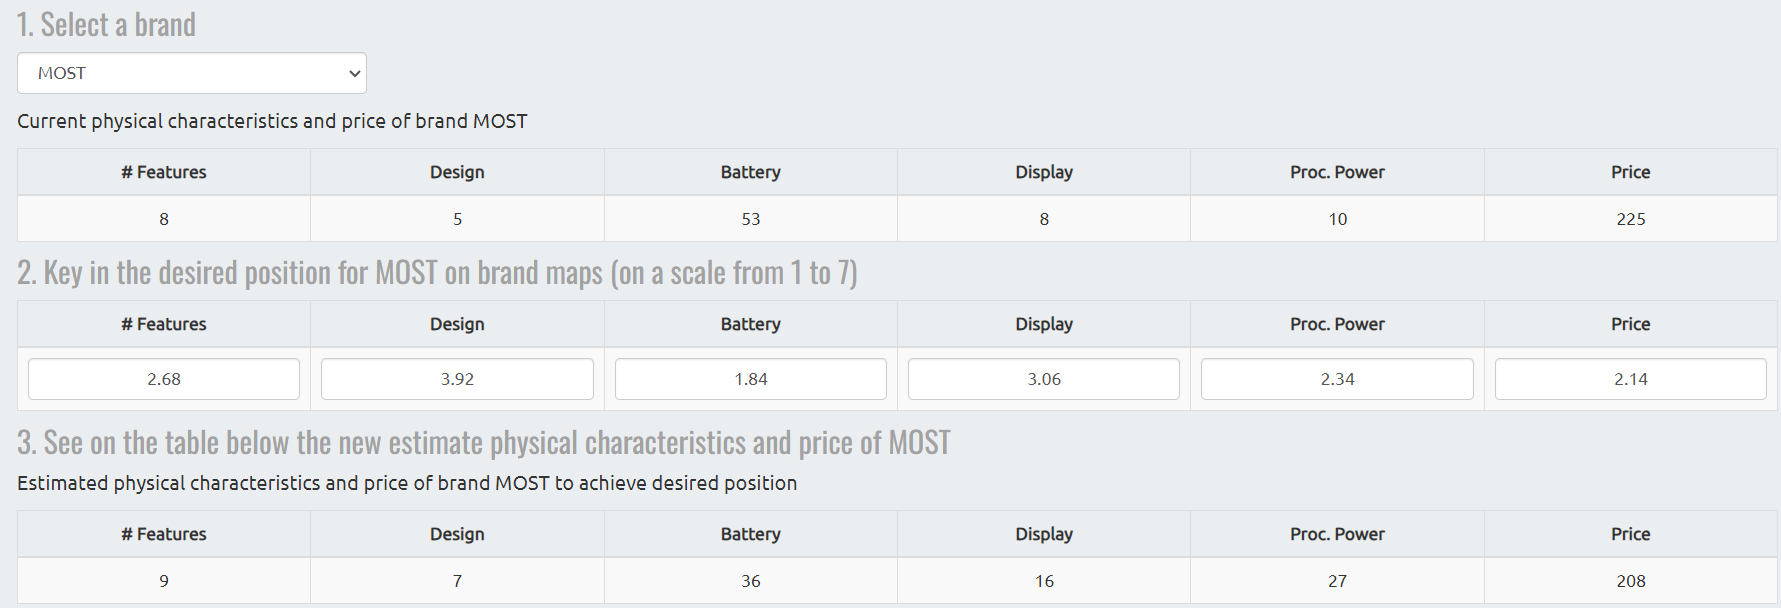

### Multi Dimensional Scaling

**Future Development for Savers**

In [20]:
df_seg_mds_fc[df_seg_mds_fc["Segment"]=="Savers"]

,Period,Segment,Economy,Performance,Convenience
Savers_4,4,Savers,12.74,-9.92,-4.12
Savers_3,3,Savers,12.62,-10.32,-4.24


- Using the values for Period 4 (when we would begin to market our new product) we obtain the following features:


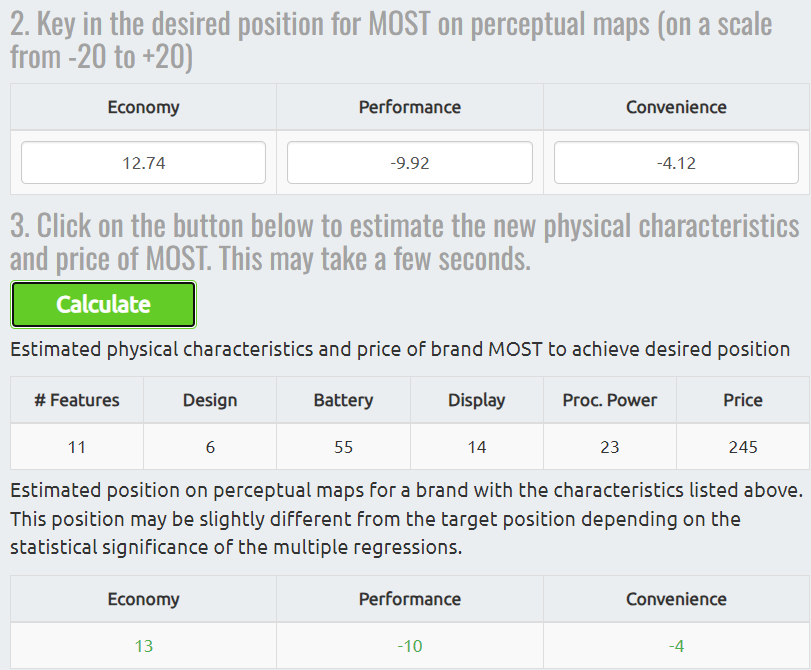

### Query Using Semantic:
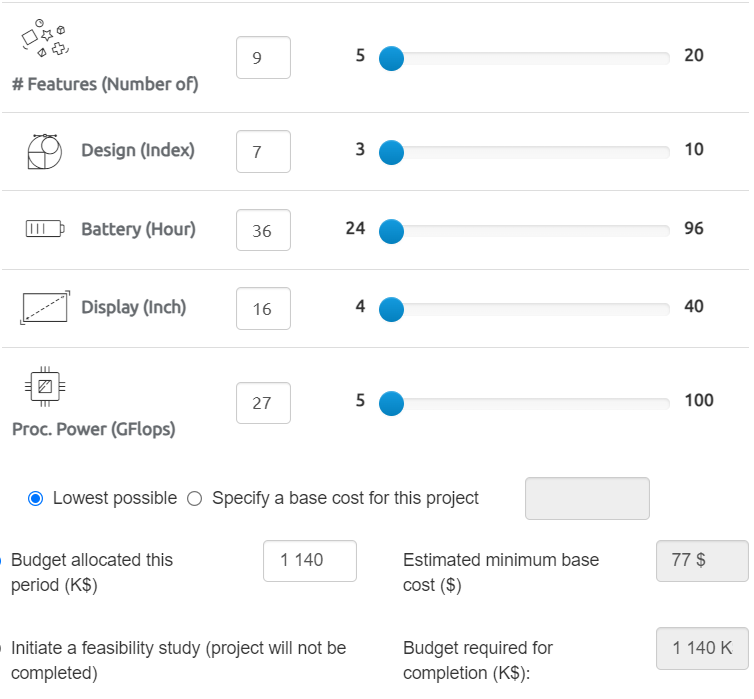

----
#### Conclusion:
- As said in the introduction, Semantic Scales should be used for R&D projects. The values for the features differ by a bit but this shouldn't be a problem.
----

## Most - Next Period
- Should we lower Prices?

### Semantic Scales

In [31]:
son.most_semantic

,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
MARKET : Sonites,,,,,,
MOST,2.11,2.34,3.31,1.61,1.5,2.36


In [21]:
df_test = df_seg_sem_fc[df_seg_sem_fc["Segment"]=="Savers"] 
df_test

,Period,Segment,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
Savers_4,4,Savers,2.68,3.92,1.84,3.06,2.34,2.14
Savers_3,3,Savers,2.63,3.91,1.81,2.89,2.29,2.13


#### Similarity Scores

In [22]:
res = an.compute_distance_centroids(df_test, son.most_semantic)
res[3]

{'Savers_4': {'MOST': 0.8429730947270763},
 'Savers_3': {'MOST': 0.8499582068804172}}

#### Absolute Distances

In [23]:
res[4]

{'Savers_4': {'MOST': array([0.5699999999999972, 1.58, 1.4699999999999993, 1.4499999999999968,
         0.8399999999999954, 0.22000000000000508], dtype=object)},
 'Savers_3': {'MOST': array([0.52, 1.5700000000000003, 1.4999999999999996, 1.2799999999999991,
         0.7899999999999991, 0.23000000000000087], dtype=object)}}

#### Changing the price to 207$ instead of 220$

In [24]:
new_most_semantic = [2.11, 2.34, 3.31, 1.61, 1.5, 2.13]
res = an.compute_distance_centroids(df_test, new_most_semantic)
res[3]


{'Savers_4': {'centroid': 0.8447265961860413},
 'Savers_3': {'centroid': 0.8519703866116334}}

In [25]:
res[4]

{'Savers_4': {'centroid': array([0.57, 1.58, 1.47, 1.45, 0.84, 0.01])},
 'Savers_3': {'centroid': array([5.2000000e-01, 1.5700000e+00, 1.5000000e+00, 1.2800000e+00,
         7.9000000e-01, 8.8817842e-16])}}

### Multi Dimensional Scaling

- The "regression-based tools" on marlstrat don't accept prices below 225$ 

In [26]:
df_test = df_seg_mds_fc[df_seg_mds_fc["Segment"]=="Savers"] 
df_test

,Period,Segment,Economy,Performance,Convenience
Savers_4,4,Savers,12.74,-9.92,-4.12
Savers_3,3,Savers,12.62,-10.32,-4.24


In [27]:
son.most_mds

,Economy,Performance,Convenience
MARKET : Sonites,,,
MOST,10.92,-17.52,-9.92
